Convolutional Neural Networks ( CNNs) are a category of Neural Networks that have proven very effective in areas such as image recognition and classification. 
CNN has been successful in identifying faces, objects and traffic signs apart from powering vision in robots and self-driving cars.

There are four main operations in the CNN: Convolution, Non-Linearity (ReLU), Pooling or Sub Sampling, Classification (Fully Connected Layer)

In [10]:
#These operations are the basic building blocks of every Convolutional Neural Network, 
#so understanding how this work is an important step to developing a sound understanding of CNN.

# An Image is a matrix of pixel values

In [11]:
# every image can be represented as a matrix of pixel values.
# channel is a conventional term used to refer to a certain component of an image


In [12]:
#An image from a standard digital camera will have three channels — Red, Green and Blue 
#You can imagine those as three 2D matrices stacked over each other (one for each colour), 
#Each having pixel values in the range 0 to 255.

In [13]:
#A grayscale image, on the other hand, has just one channel. 
#For this post, we will only consider grayscale images, so we will have a single 2D matrix representing an image. 
#The value of each pixel in the matrix will range from 0 to 255 __zero indicating black and 255 indicating white

# Convolution

The primary purpose of Convolution in case of a CNN is to extract features from the input image. 
Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data.

In [14]:
#note that for a grayscale image, pixel values range from 0 to 255
#After the Convolution operation. The output matrix is called Convolved Feature or Feature Map.

Take a moment to understand how the computation above is being done. We slide the orange matrix over our original image (green) by 1 pixel (also called ‘stride’) and for every position, we compute element-wise multiplication (between the two matrices) and add the multiplication outputs to get the final integer which forms a single element of the output matrix (pink). Note that the 3×3 matrix “sees” only a part of the input image in each stride.
In CNN terminology, the 3×3 matrix is called a ‘filter‘ and the matrix formed by sliding the filter over the image and computing the dot product is called the ‘Convolved Feature’ or ‘Activation Map’ or the ‘Feature Map‘. It is important to note that filters act as feature detectors from the original input image.

#Stride: 
Stride is the number of pixels by which we slide our filter matrix over the input matrix. When the stride is 1 then we move the filters one pixel at a time. When the stride is 2, then the filters jump 2 pixels at a time.

Zero-padding: Sometimes, it is convenient to pad the input matrix with zeros around the border, so that we can apply the filter to bordering elements of our input image matrix.

# RELU (Rectified Linear Unit)

ReLU is a type of activation function. Mathematically, it is defined as y = max(0, x). Activaton functions basically determine what the output will look like given a set of input

# Pooling Layer

When constructing CNNs, it is common to insert pooling layers after each convolution layer to reduce the spatial size of the representation to reduce the parameter counts which reduces the computational complexity. Also, pooling layers helps with the overfitting problem

# Classification (Fully Connected Layer)

The fully connected input layer (flatten): takes the output of the previous layers, “flattens” them and turns them into a single vector that can be an input for the next stage.


The first fully connected layer: takes the inputs from the feature analysis and applies weights to predict the correct label.

Fully connected output layer: gives the final probabilities for each label. The neuron with a maximum probability is our output for the model.

# MNIST DATASET

Each image is a 28 by 28-pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it. It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict.

In [15]:
#Download Dataset
import tensorflow as tf
import numpy as np
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()

#This code refused to run multiple times even after installing the tensorflow environment of anaconda
#Had to install jupyter notebook in the tensorflow environment

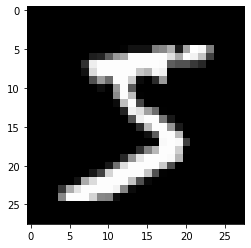

In [16]:
#check one of the images how it looks like

import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [17]:
#import packages

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

#install via "pip install keras" didn't work. Used this command from anaconda website "conda install -c conda-forge keras"

# Reshape and Normalize The Data

In [18]:
#Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [19]:
#Next, we need reshape dataset so that it is suitable for use training a CNN
#In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height][channels].
#In the case of RGB, the last dimension pixels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every colour image.
#In the case of MNIST where the pixel values are grayscale, the pixel dimension is set to 1

# Build CNN Model

Summary of our network architecture is given below:

The first hidden layer is a convolutional layer called a Convolution2D. The layer has 28feature maps, which with the size of 3×3 and a rectifier activation function. This is the input layer, expecting images with the structure outlined above [pixels][width][height].

Next, we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.

Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.

The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 30% of neurons in the layer to reduce overfitting.

Next a fully connected layer with 200 neurons and rectifier activation function. Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

In [20]:
#As before, the model is trained using logarithmic loss and the ADAM gradient descent algorithm.

In [22]:
model = Sequential() 
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten()) 
model.add(Dense(200,activation = tf.nn.relu)) 
model.add(Dropout(0.3)) 
model.add(Dense(10,activation=tf.nn.softmax))

# Compile and Fit Our Model

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x= x_train , y = y_train , epochs= 10)

Epoch 1/10
60000/60000 [==============================] - 21s 344us/step - loss: 0.1942 - accuracy: 0.9427
Epoch 2/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.0854 - accuracy: 0.9744
Epoch 3/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.0617 - accuracy: 0.9815
Epoch 4/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.0481 - accuracy: 0.9854
Epoch 5/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.0386 - accuracy: 0.9880
Epoch 6/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.0308 - accuracy: 0.9902
Epoch 7/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.0267 - accuracy: 0.9919
Epoch 8/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.0231 - accuracy: 0.9921
Epoch 9/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.0198 - accuracy: 0.9936
Epoch 10/10
60000/60000 [============

In [24]:
#So for 10 epochs, we get 99% accuracy lets test with testing data

In [25]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 122us/step


[0.046228383775797736, 0.9866999983787537]

for testing data also we get approximately 99% accuracy, which is very good as this is our starting model, we can always tune our model for better predictions.

Ref: https://medium.com/subex-ai-labs/build-your-1st-deep-learning-classification-model-with-mnist-dataset-1eb27227746b